# Know Sure Thing (KST)

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:know_sure_thing_kst

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2017-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,115.800003,116.330002,114.760002,116.150002,112.140007,28781900
2017-01-04,115.849998,116.510002,115.750000,116.019997,112.014503,21118100
2017-01-05,115.919998,116.860001,115.809998,116.610001,112.584129,22193600
2017-01-06,116.779999,118.160004,116.470001,117.910004,113.839249,31751900
2017-01-09,117.949997,119.430000,117.940002,118.989998,114.881950,33561900


In [3]:
df['10_ROC'] = ((df['Adj Close'] - df['Adj Close'].shift(10))/df['Adj Close'].shift(10)) * 100
df['15_ROC'] = ((df['Adj Close'] - df['Adj Close'].shift(15))/df['Adj Close'].shift(15)) * 100
df['20_ROC'] = ((df['Adj Close'] - df['Adj Close'].shift(20))/df['Adj Close'].shift(20)) * 100
df['30_ROC'] = ((df['Adj Close'] - df['Adj Close'].shift(30))/df['Adj Close'].shift(30)) * 100

In [4]:
df['RCMA1'] = df['10_ROC'].rolling(10).mean()
df['RCMA2'] = df['15_ROC'].rolling(10).mean()
df['RCMA3'] = df['20_ROC'].rolling(10).mean()
df['RCMA4'] = df['30_ROC'].rolling(10).mean()
df['KST'] = df['RCMA1']*1 + df['RCMA2']*2 + df['RCMA3']*3 + df['RCMA4']*4
df['Signal Line'] = df['KST'].rolling(9).mean()

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,10_ROC,15_ROC,20_ROC,30_ROC,RCMA1,RCMA2,RCMA3,RCMA4,KST,Signal Line
Date,,,,,,,,,,,,,,,,
2017-01-03,115.800003,116.330002,114.760002,116.150002,112.140007,28781900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,115.849998,116.510002,115.750000,116.019997,112.014503,21118100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,115.919998,116.860001,115.809998,116.610001,112.584129,22193600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,116.779999,118.160004,116.470001,117.910004,113.839249,31751900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,117.949997,119.430000,117.940002,118.989998,114.881950,33561900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5,0,'Date')

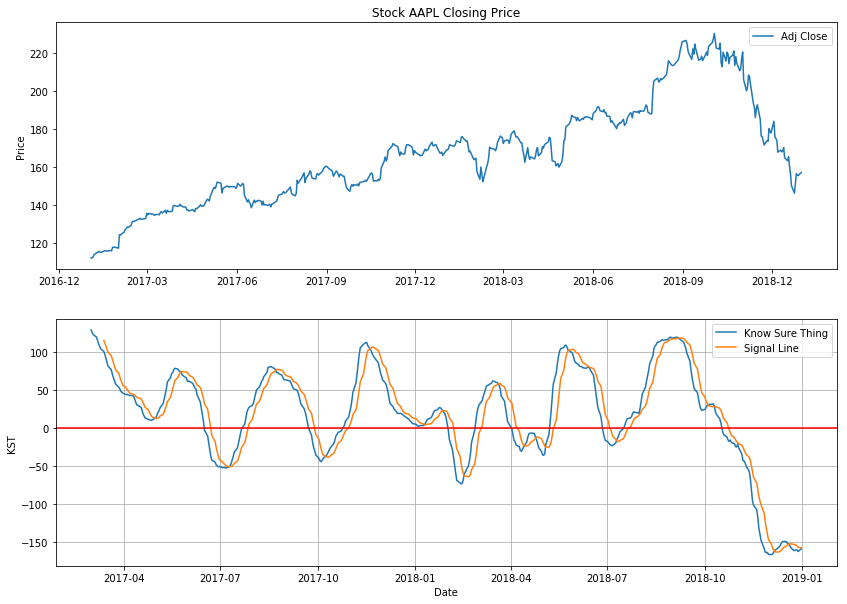

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['KST'], label='Know Sure Thing')
ax2.plot(df['Signal Line'], label='Signal Line')
ax2.axhline(y=0, color='red')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('KST')
ax2.set_xlabel('Date')

Text(0.5,0,'Date')

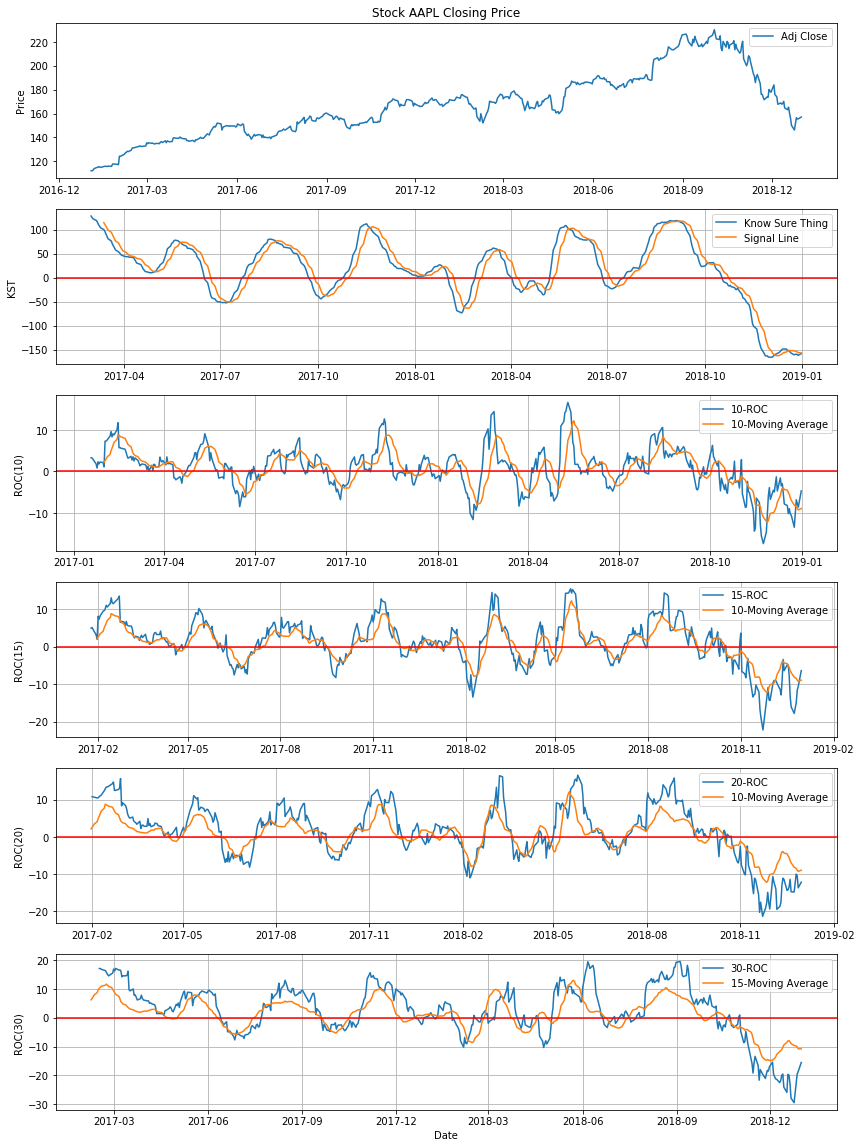

In [7]:
fig = plt.figure(figsize=(14,20))
ax1 = plt.subplot(6, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(6, 1, 2)
ax2.plot(df['KST'], label='Know Sure Thing')
ax2.plot(df['Signal Line'], label='Signal Line')
ax2.axhline(y=0, color='red')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('KST')

ax3 = plt.subplot(6, 1, 3)
ax3.plot(df['10_ROC'], label='10-ROC')
ax3.plot(df['RCMA1'], label='10-Moving Average')
ax3.axhline(y=0, color='red')
ax3.grid()
ax3.legend(loc='best')
ax3.set_ylabel('ROC(10)')

ax4 = plt.subplot(6, 1, 4)
ax4.plot(df['15_ROC'], label='15-ROC')
ax4.plot(df['RCMA1'], label='10-Moving Average')
ax4.axhline(y=0, color='red')
ax4.grid()
ax4.legend(loc='best')
ax4.set_ylabel('ROC(15)')

ax5 = plt.subplot(6, 1, 5)
ax5.plot(df['20_ROC'], label='20-ROC')
ax5.plot(df['RCMA1'], label='10-Moving Average')
ax5.axhline(y=0, color='red')
ax5.grid()
ax5.legend(loc='best')
ax5.set_ylabel('ROC(20)')

ax6 = plt.subplot(6, 1, 6)
ax6.plot(df['30_ROC'], label='30-ROC')
ax6.plot(df['RCMA2'], label='15-Moving Average')
ax6.axhline(y=0, color='red')
ax6.grid()
ax6.legend(loc='best')
ax6.set_ylabel('ROC(30)')
ax6.set_xlabel('Date')

## Candlestick with KST

In [8]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,10_ROC,15_ROC,20_ROC,30_ROC,RCMA1,RCMA2,RCMA3,RCMA4,KST,Signal Line,VolumePositive
0,736332.0,115.800003,116.330002,114.760002,116.150002,112.140007,28781900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,736333.0,115.849998,116.510002,115.750000,116.019997,112.014503,21118100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,736334.0,115.919998,116.860001,115.809998,116.610001,112.584129,22193600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,736335.0,116.779999,118.160004,116.470001,117.910004,113.839249,31751900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,736338.0,117.949997,119.430000,117.940002,118.989998,114.881950,33561900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


Text(0.5,0,'Date')

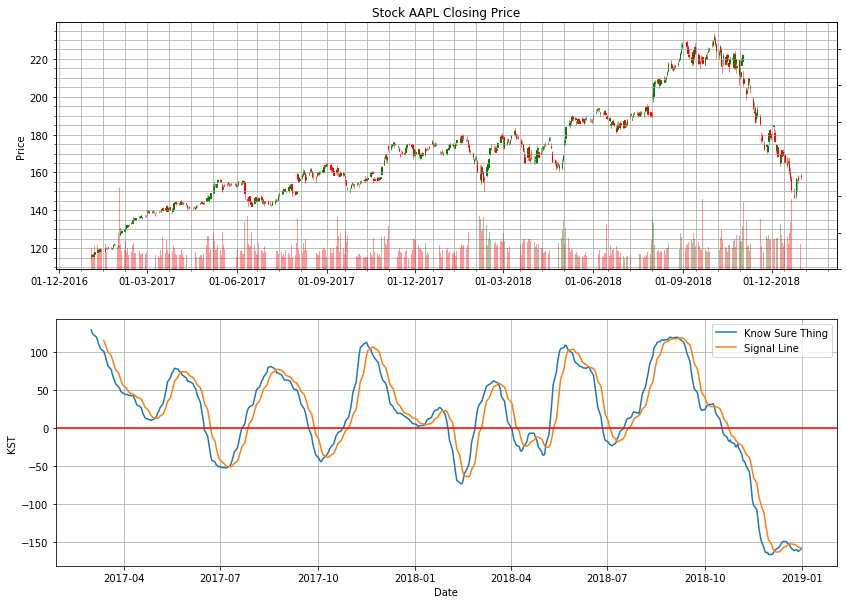

In [9]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['KST'], label='Know Sure Thing')
ax2.plot(df['Signal Line'], label='Signal Line')
ax2.axhline(y=0, color='red')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('KST')
ax2.set_xlabel('Date')